# 训练机器学习模型

## 导入依赖项
首先导入TensorFlow和其他用于数据处理和可视化的支持库

In [1]:
!sudo apt-get update

Get:1 https://dl.yarnpkg.com/debian stable InRelease [17.1 kB]
Get:2 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease [3632 B]
Get:3 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease [3961 B]
Get:4 https://dl.yarnpkg.com/debian stable/main all Packages [11.8 kB]
Get:5 https://dl.yarnpkg.com/debian stable/main amd64 Packages [11.8 kB]       
Get:6 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main all Packages [2714 B]
Get:7 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main amd64 Packages [294 kB]
Get:8 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable/main amd64 Packages [4557 B]
Get:9 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]                
Get:11 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]     
Get:10 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease [28.0 kB] 
Get:12 http://archive.ubuntu.com/ubuntu focal-updates InRelease [1

In [2]:
!sudo apt-get install libusb-1.0-0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libusb-1.0-0
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 46.5 kB of archives.
After this operation, 139 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libusb-1.0-0 amd64 2:1.0.23-2build1 [46.5 kB]
Fetched 46.5 kB in 1s (47.1 kB/s)       
Selecting previously unselected package libusb-1.0-0:amd64.
(Reading database ... 70090 files and directories currently installed.)
Preparing to unpack .../libusb-1.0-0_2%3a1.0.23-2build1_amd64.deb ...
Unpacking libusb-1.0-0:amd64 (2:1.0.23-2build1) ...
Setting up libusb-1.0-0:amd64 (2:1.0.23-2build1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.16) ...


In [3]:
!pip install tflite-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-datasets to determine which version is compatible with other requirements. This could take a while.
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
INFO: pip is looking at multiple versions of tensorflow-metadata to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at mult

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

2024-06-14 07:01:12.689885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-14 07:01:12.689935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.4


## 下载MNIST数据集并打印展示

In [5]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized')

Pixels are normalized


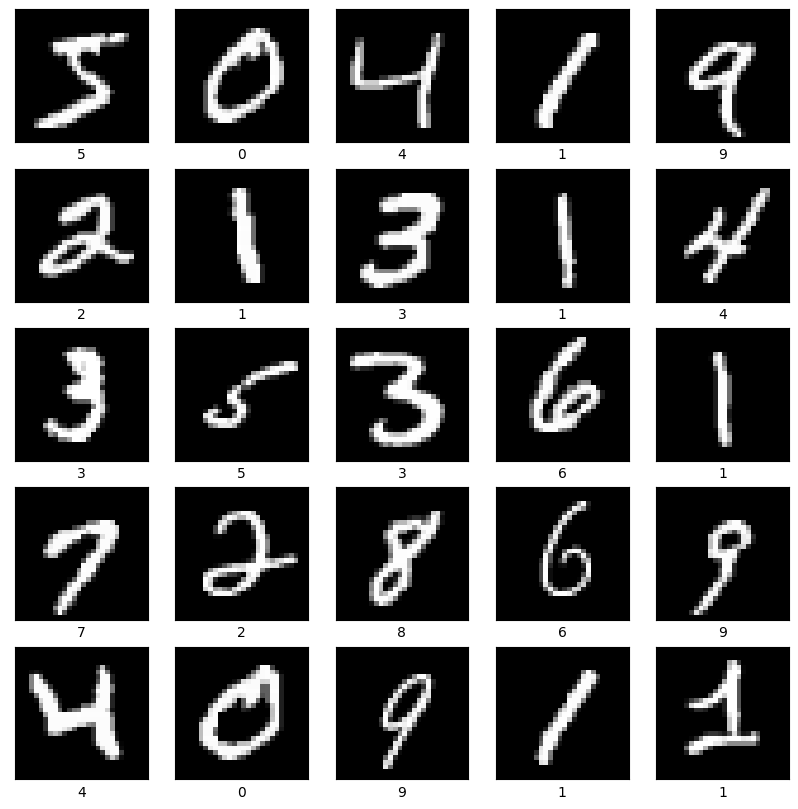

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

## 训练TensorFlow对图像进行分类

In [8]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

2024-06-14 07:07:21.327711: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-14 07:07:21.327740: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-14 07:07:21.327758: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-11eef8): /proc/driver/nvidia/version does not exist
2024-06-14 07:07:21.327959: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 07:07:21.503387: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1397 - accuracy: 0.9576
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0534 - accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0407 - accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0321 - accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0243 - accuracy: 0.9918


## 评估模型

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0418 - accuracy: 0.9875
Test accuracy: 0.987500011920929


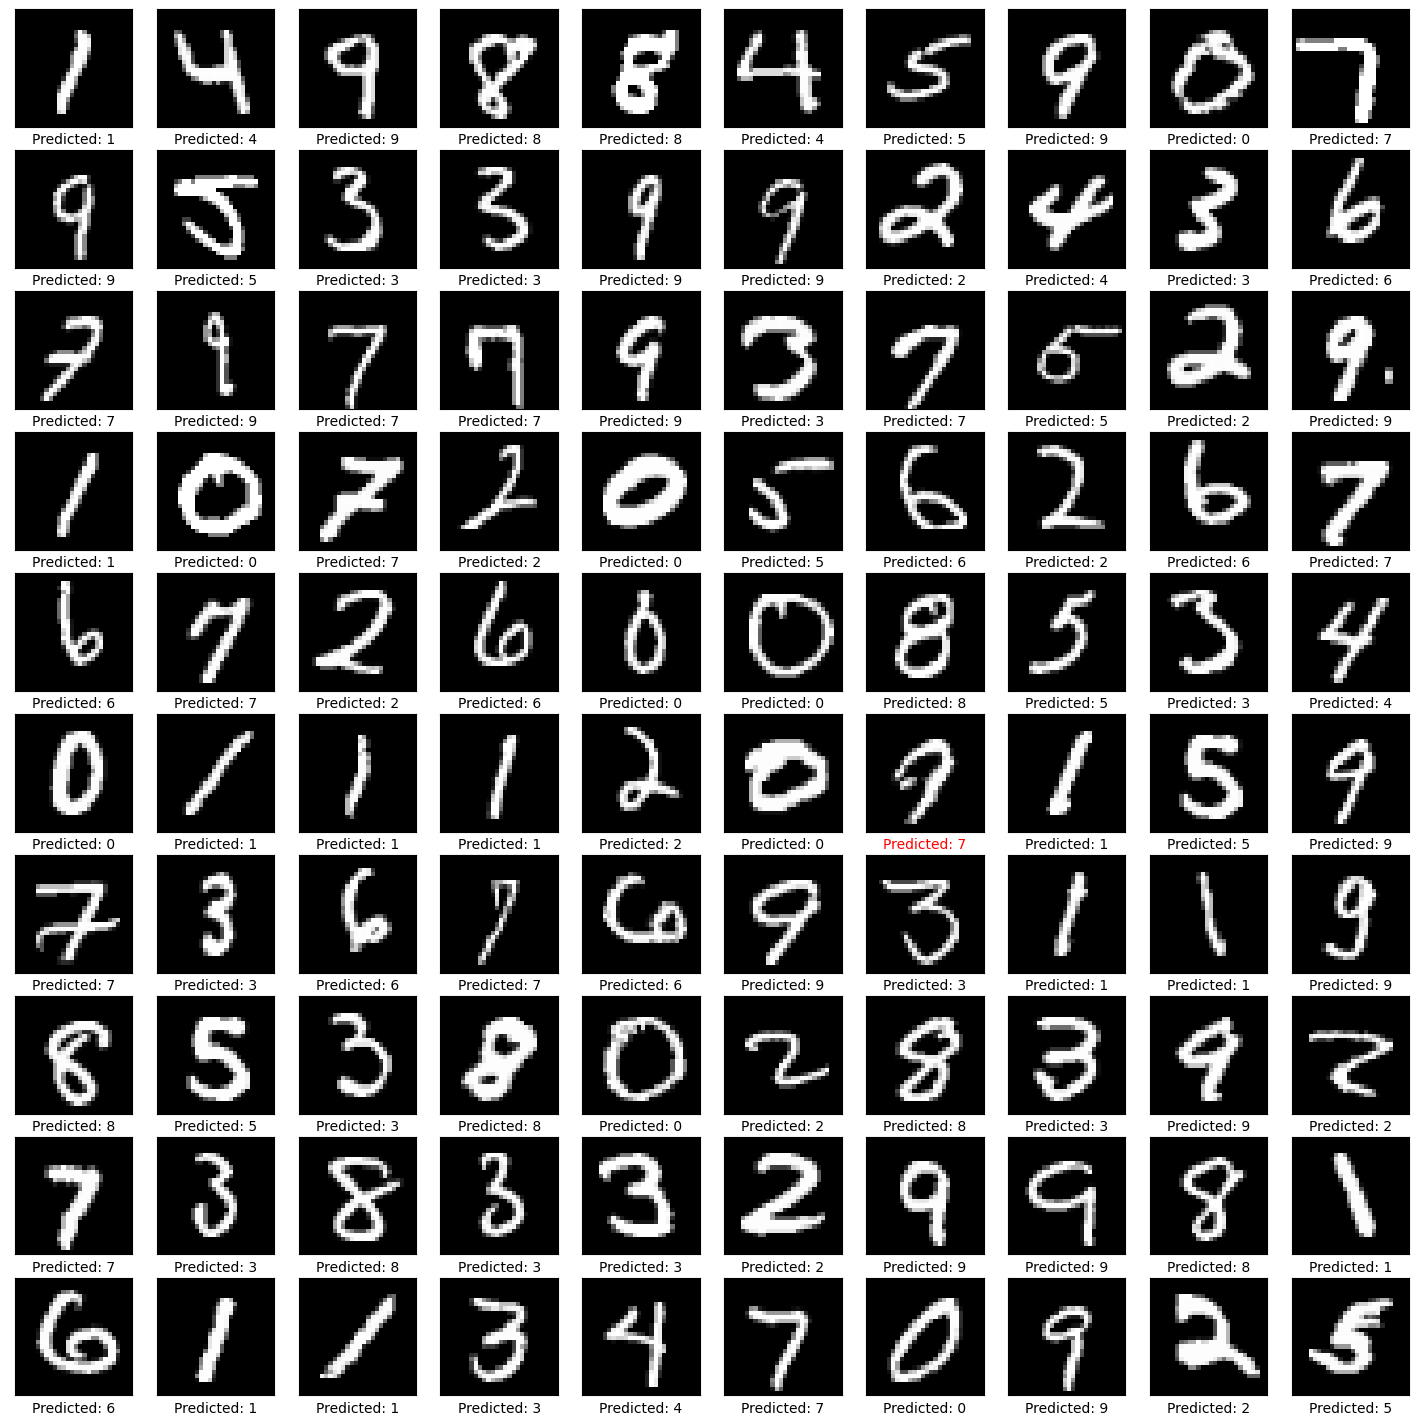

In [11]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

predictions = model.predict(test_images)

prediction_digits = np.argmax(predictions, axis=1)

plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()

## 将模型转换为TensorFlow Lite
使模型能够在Android上进行部署

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

2024-06-14 07:15:41.155983: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpap27k79m/assets
Float model size = 436KBs.


2024-06-14 07:15:41.909847: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2024-06-14 07:15:41.909881: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2024-06-14 07:15:41.910464: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpap27k79m
2024-06-14 07:15:41.911692: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2024-06-14 07:15:41.911709: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpap27k79m
2024-06-14 07:15:41.916884: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-06-14 07:15:41.949403: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpap27k79m
2024-06-14 07:15:41.959857: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 49395 m

In [13]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: /tmp/tmpj20fsenm/assets


INFO:tensorflow:Assets written to: /tmp/tmpj20fsenm/assets


Quantized model size = 114KBs,
which is about 26% of the float model size.


2024-06-14 07:16:07.788815: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2024-06-14 07:16:07.788851: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2024-06-14 07:16:07.789031: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpj20fsenm
2024-06-14 07:16:07.790369: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2024-06-14 07:16:07.790386: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpj20fsenm
2024-06-14 07:16:07.793491: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-06-14 07:16:07.824329: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpj20fsenm
2024-06-14 07:16:07.834625: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 45596 m

In [14]:
def evaluate_tflite_model(tflite_model):
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()
  input_tensor_index = interpreter.get_input_details()[0]["index"]
  output = interpreter.tensor(interpreter.get_output_details()[0]["index"])


  prediction_digits = []
  for test_image in test_images:

    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_tensor_index, test_image)


    interpreter.invoke()


    digit = np.argmax(output()[0])
    prediction_digits.append(digit)


  accurate_count = 0
  for index in range(len(prediction_digits)):
    if prediction_digits[index] == test_labels[index]:
      accurate_count += 1
  accuracy = accurate_count * 1.0 / len(prediction_digits)

  return accuracy


float_accuracy = evaluate_tflite_model(tflite_float_model)
print('Float model accuracy = %.4f' % float_accuracy)


quantized_accuracy = evaluate_tflite_model(tflite_quantized_model)
print('Quantized model accuracy = %.4f' % quantized_accuracy)
print('Accuracy drop = %.4f' % (float_accuracy - quantized_accuracy))

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Float model accuracy = 0.9875
Quantized model accuracy = 0.9875
Accuracy drop = 0.0000


In [16]:
f = open('mnist.tflite', "wb")
f.write(tflite_quantized_model)
f.close()